In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the City Cemetery data into a pandas DataFrame. Hint: see the read_excel function.

In [11]:
cemetery_df= pd.read_excel(r"C:\Users\antoi\nss-data-analytics\Projects\advanced-pandas-antoinette-anderson\data\Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx", skiprows=None)
print(cemetery_df)

       Volume                           Name Burial Month  Month No.  \
0          6B                Bell, Nancy Ann          Aug        8.0   
1          6W  Drake, Mary Edith Smith, Mrs.          May        5.0   
2          6D                  Davis, Bessie          Sep        9.0   
3          6C            Creech, Emily Green          Aug        8.0   
4          6W            Creech, Emily Green          Aug        8.0   
...       ...                            ...          ...        ...   
19740  4-1846            Kingsley, A., Capt.          Sep        9.0   
19741  4-1846                         infant          Sep        9.0   
19742  4-1846                 White, Lucinda          Sep        9.0   
19743  5-1881               Higgins, Rebecca          Apr        4.0   
19744  5-1881                       Eves, R.          Apr        4.0   

       Burial Day  Burial Year Sex Race   Age             Residence  \
0             6.0       1979.0   F    W  10.0                   

In [65]:
cemetery_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [66]:
cemetery_df.tail()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"
19744,5-1881,"Eves, R.",Apr,4.0,25.0,NaN,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot"


In [83]:
cemetery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


2a. Find the 10 most common (known) recorded causes of death.

In [71]:
cemetery_df['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64

2b Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [89]:
cemetery_replace=cemetery_df.replace('Cholrea', 'Cholera').replace('Still Born', 'Stillborn').replace('Feever', 'Fever').replace('Not Known', 'Unknown').replace('Diarherea', 'Diarrhea')
print(cemetery_replace)

       Volume                           Name Burial Month  Month No.  \
0          6B                Bell, Nancy Ann          Aug        8.0   
1          6W  Drake, Mary Edith Smith, Mrs.          May        5.0   
2          6D                  Davis, Bessie          Sep        9.0   
3          6C            Creech, Emily Green          Aug        8.0   
4          6W            Creech, Emily Green          Aug        8.0   
...       ...                            ...          ...        ...   
19740  4-1846            Kingsley, A., Capt.          Sep        9.0   
19741  4-1846                         infant          Sep        9.0   
19742  4-1846                 White, Lucinda          Sep        9.0   
19743  5-1881               Higgins, Rebecca          Apr        4.0   
19744  5-1881                       Eves, R.          Apr        4.0   

       Burial Day  Burial Year Sex Race   Age             Residence  \
0             6.0       1979.0   F    W  10.0                   

c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

In [91]:
cemetery_replace['Cause of Death/Burial'].value_counts().head(10)


Cause of Death/Burial
Unknown         1899
Consumption     1767
Cholera         1242
Stillborn        926
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Teething         411
Name: count, dtype: int64

<Axes: ylabel='Cause of Death/Burial'>

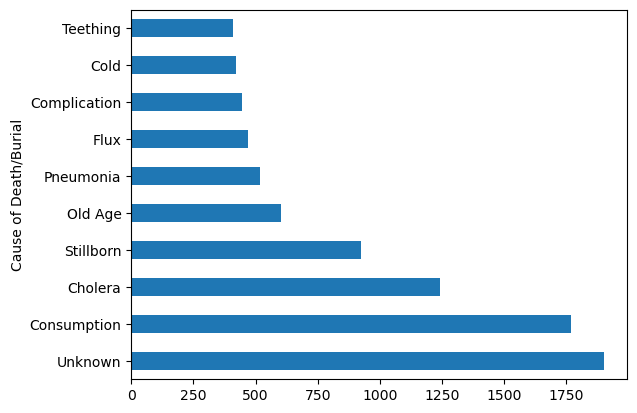

In [92]:
cemetery_replace['Cause of Death/Burial'].value_counts().head(10).plot(kind='barh')

3.Create a line chart showing the number of burials per year.

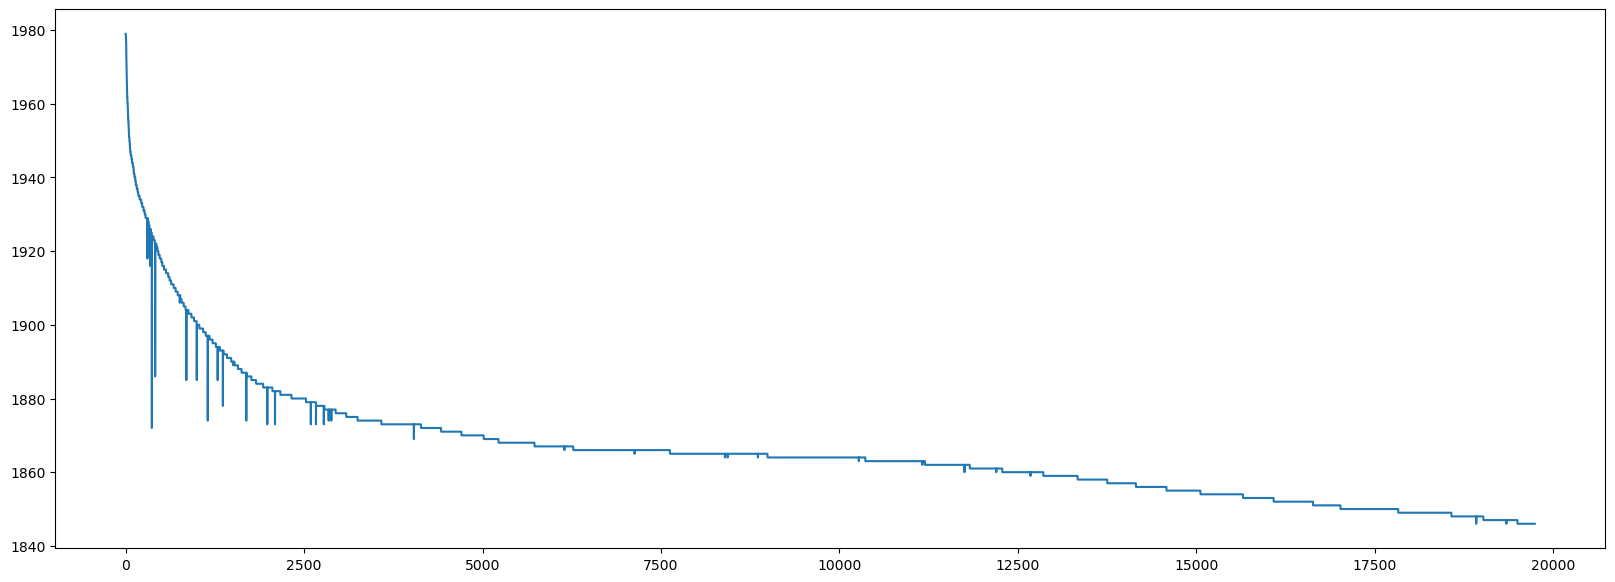

In [118]:
#cemetery_df['Burial Year'].plot(figsize=(20,5))

#trying matplotlib
plt.figure(figsize=(20,7))
plt.plot(cemetery_df['Burial Year'], label='Burials From 1840-1979')



4a. Use the crosstab function to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.
b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.
c. Filter your table to show only the years 1846 through 1860.


In [173]:
cemetery_years=cemetery_df[cemetery_df['Burial Year'].isin([1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860])]
order_of_months= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cemetery_df['Burial Month'] = pd.Categorical(cemetery_df['Burial Month'],categories=order_of_months, ordered=True)
cemetery_months = cemetery_df.sort_values(by='Burial Month')
pd.crosstab(cemetery_years['Burial Year'].astype(int), cemetery_months['Burial Month'])

4d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

In [167]:
cemetery_df[['Cause of Death/Burial','Burial Month','Burial Year']].value_counts().head(10)


Cause of Death/Burial  Burial Month  Burial Year
Cholera                Sep           1866.0         327
Cholrea                Jul           1850.0         228
                       Jun           1849.0         171
Cholera                Jun           1873.0          72
                                     1854.0          61
Cholrea                Jun           1850.0          59
Cholera                Oct           1866.0          56
Cholrea                Jun           1873.0          55
Not Known              Jul           1850.0          46
Cholrea                Jul           1849.0          37
Name: count, dtype: int64

5a. Create a "Decade" column to show the decade in which a burial occurred.
5b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.
5c. Create a clustered bar chart to show how male and female burials have changed over time.

In [179]:
#cemetery_df['Decade']=(cemetery_df['Burial Year'] //10)*10
#print(cemetery_df[['Burial Year', 'Decade', 'Sex']])
cemetery_df['Number of Deaths By Sex']=cemetery_df['Sex'].value_counts()
print(cemetery_df['Number of Deaths By Sex'])
#this needs a redo
cemetery_df.pivot(index='Decade', columns='Sex', values ='Number of Deaths By Sex').plot(kind='bar')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

ValueError: Index contains duplicate entries, cannot reshape